# Oil well development

**The  purpose of the study** is to build a model to determine the most profitable region for oil production. The data contains information on oil samples from three regions: each has 10,000 fields where oil quality and reserves have been measured.

**Course of Work**:
1. [Loading and preparing data](#preprocessing)
2. [Training and validation of models](#models)
3. [Preparing for Profit Calculation](#preparation)
4. [Calculating profit and risk](#profit)

The algorithm for model training is *linear regression*, \
the metric for evaluating the quality of forecasting is *RMSE*.

<a id="preprocessing"></a>
## Data loading and preprocessing

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [4]:
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [5]:
data_0.info(), data_1.info(), data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null 

(None, None, None)

There are no gaps in the data. Each set has the same number of rows and columns.

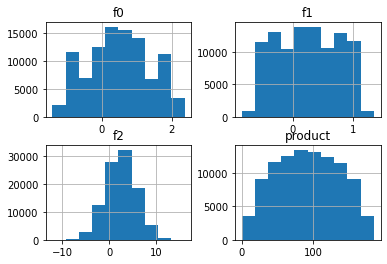

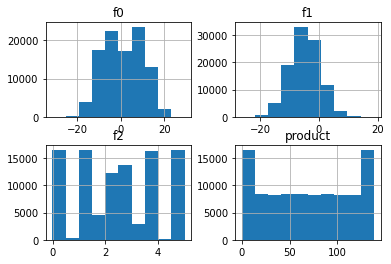

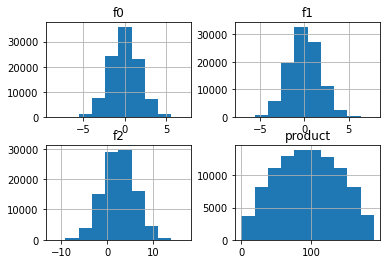

In [6]:
data_0.hist(), data_1.hist(), data_2.hist()
plt.show()

The ranges of feature values are not the same. To prevent the model from considering one attribute more important than another, it will be necessary to standardize the data before training. At the same stage, the set for each region should be divided into training and validation samples (75:25 ratio).

In [7]:
def prepare_data(features, target):
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345)
    
    # scaling
    scaler = StandardScaler()
    scaler.fit(features_train)
    
    features_train = pd.DataFrame(scaler.transform(features_train), columns=features.columns)
    features_valid = pd.DataFrame(scaler.transform(features_valid), columns=features.columns)
    
    return features_train, features_valid, target_train, target_valid

In [8]:
features_0 = data_0[['f0', 'f1', 'f2']]
target_0 = data_0['product']

features_1 = data_1[['f0', 'f1', 'f2']]
target_1 = data_1['product']

features_2 = data_2[['f0', 'f1', 'f2']]
target_2 = data_2['product']

In [9]:
# train and valid sets
features_train_0, features_valid_0, target_train_0, target_valid_0 = prepare_data(features_0, target_0)
features_train_1, features_valid_1, target_train_1, target_valid_1 = prepare_data(features_1, target_1)
features_train_2, features_valid_2, target_train_2, target_valid_2 = prepare_data(features_2, target_2)

The *product* column represents the **target variable** - the volume of reserves in the well (thousand barrels). Columns *f0, f1, f2* are three significant attributes of the points. The last column(*id*) contains a unique well identifier. It is unimportant for model training, so it was excluded at the stage of data separation.

In [10]:
features_train_0.shape[0], features_valid_0.shape[0]

(75000, 25000)

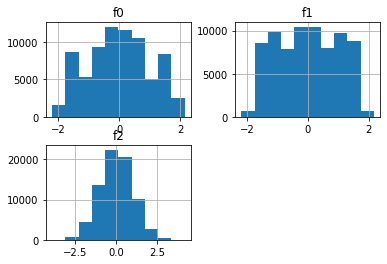

In [11]:
# example of features after standardization
features_train_0.hist()
plt.show()

<a id="models"></a>
## Model training and validation

Let's train the linear regression model for each region separately and compare the results.

In [19]:
# region 0
model = LinearRegression()
model.fit(features_train_0, target_train_0)

predictions_0 = pd.Series(model.predict(features_valid_0))
target_valid_0.reset_index(drop=True, inplace=True)

RMSE_0 = (mean_squared_error(target_valid_0, predictions_0)) ** 0.5
mean_reserve_0 = predictions_0.mean()

print(f'Регион 0: RMSE={round(RMSE_0, 2)}, средний запас предсказанного сырья = {round(mean_reserve_0)} тыс.баррелей')

Регион 0: RMSE=37.58, средний запас предсказанного сырья = 93 тыс.баррелей


In [20]:
# region 1
model = LinearRegression()
model.fit(features_train_1, target_train_1)

predictions_1 = pd.Series(model.predict(features_valid_1))
target_valid_1.reset_index(drop=True, inplace=True)

RMSE_1 = (mean_squared_error(target_valid_1, predictions_1)) ** 0.5
mean_reserve_1 = predictions_1.mean()

print(f'Регион 1: RMSE={round(RMSE_1, 2)}, средний запас предсказанного сырья = {round(mean_reserve_1)} тыс.баррелей')

Регион 1: RMSE=0.89, средний запас предсказанного сырья = 69 тыс.баррелей


In [21]:
# region 2
model = LinearRegression()
model.fit(features_train_2, target_train_2)

predictions_2 = pd.Series(model.predict(features_valid_2))
target_valid_2.reset_index(drop=True, inplace=True)

RMSE_2 = (mean_squared_error(target_valid_2, predictions_2)) ** 0.5
mean_reserve_2 = predictions_2.mean()

print(f'Регион 2: RMSE={round(RMSE_2, 2)}, средний запас предсказанного сырья = {round(mean_reserve_2)} тыс.баррелей')

Регион 2: RMSE=40.03, средний запас предсказанного сырья = 95 тыс.баррелей


Region 2 is the leader in terms of the average stock of predicted raw materials. Region 0 is slightly behind, but its predictions are characterized by a smaller error. The lowest error is shown by the model trained on data from region #1: RMSE < 1, but the predicted average oil reserve here is much lower than in the previous cases.

In [17]:
# Model training for predicting oil reserves in the field
# i - region number
def fit_region_model(i, features_train, features_valid, target_train, target_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)

    predictions = pd.Series(model.predict(features_valid))
    target_valid.reset_index(drop=True, inplace=True)

    RMSE = (mean_squared_error(target_valid, predictions)) ** 0.5
    mean_reserve = predictions.mean()

    print(f'Регион {i}: RMSE={round(RMSE, 2)}, средний запас предсказанного сырья = {round(mean_reserve)} тыс.баррелей')
    
    return target_valid, predictions

In [18]:
# region 0
target_valid_0, predictions_0 = fit_region_model(0, features_train_0, features_valid_0, target_train_0, target_valid_0)

# region 1
target_valid_1, predictions_1 = fit_region_model(1, features_train_1, features_valid_1, target_train_1, target_valid_1)

# region 2
target_valid_2, predictions_2 = fit_region_model(2, features_train_2, features_valid_2, target_train_2, target_valid_2)

Регион 0: RMSE=37.58, средний запас предсказанного сырья = 93 тыс.баррелей
Регион 1: RMSE=0.89, средний запас предсказанного сырья = 69 тыс.баррелей
Регион 2: RMSE=40.03, средний запас предсказанного сырья = 95 тыс.баррелей


<a id="preparation"></a>
## Preparation for profit calculation

In [22]:
# regional development budget (200 wells)
BUDGET = 10000000000

# cost per thousand barrels of oil
COST = 450000

Sufficient raw material volume for break-even development of a new well:

In [23]:
volume = BUDGET / (COST*200)
print(f'{round(volume)} тыс.баррелей') 

111 тыс.баррелей


The obtained value is greater than the previously calculated average values of the predicted stock of raw materials in the regions. Consequently, it is not profitable to take "average" wells for development: there are enough wells in the region, the development of which will bring only losses. It is necessary to select those for which the predicted volume of raw materials is greater than 111 thousand barrels.

<a id="profit"></a>
## Calculation of profit and risks

Estimate the profit distribution using the *Bootstrap* technique (1000 samples of 500 wells), calculate the mean, 95% confidence interval and risk of loss.

In [31]:
# function for calculating profit
def get_profit(target, predictions, count=200):
    predictions_sorted = predictions.sort_values(ascending=False)
    selected = target[predictions_sorted.index][:count]
    profit = selected.sum()*COST - BUDGET
    
    return profit

In [34]:
# check
get_profit(target_valid_0, predictions_0)

3320826043.1398506

In [27]:
state = np.random.RandomState(12345)

In [33]:
# Bootstrap method implementation
def bootstrap_params(target, predictions):
    values = []
    
    for i in range(1000):
        target_subsample = target.sample(500, random_state=state)
        predictions_subsample = predictions[target_subsample.index]
        profit = get_profit(target_subsample, predictions_subsample)
        values.append(profit)

    values = pd.Series(values)

    mean_profit = values.mean()
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    loss = (values < 0).mean()

    return mean_profit, lower, upper, loss

In [35]:
def format_big_n(n):
    return '{:,.0f}'.format(n).replace(',', ' ')

In [36]:
# region 0
mean_0, lower_0, upper_0, loss_0 = bootstrap_params(target_valid_0, predictions_0)
print(f'Регион 0. Средняя прибыль: {format_big_n(mean_0)} руб. Доверительный интервал: от {format_big_n(lower_0)} до \
{format_big_n(upper_0)} руб. Риск убытков: {"{:.2%}".format(loss_0)}')

Регион 0. Средняя прибыль: 380 721 840 руб. Доверительный интервал: от -126 947 638 до 879 613 968 руб. Риск убытков: 7.20%


In [37]:
# region 1
mean_1, lower_1, upper_1, loss_1 = bootstrap_params(target_valid_1, predictions_1)
print(f'Регион 1. Средняя прибыль: {format_big_n(mean_1)} руб. Доверительный интервал: от {format_big_n(lower_1)} до \
{format_big_n(upper_1)} руб. Риск убытков: {"{:.2%}".format(loss_1)}')

Регион 1. Средняя прибыль: 454 734 058 руб. Доверительный интервал: от 46 730 085 до 840 213 356 руб. Риск убытков: 1.30%


In [38]:
# region 2
mean_2, lower_2, upper_2, loss_2 = bootstrap_params(target_valid_2, predictions_2)
print(f'Регион 2. Средняя прибыль: {format_big_n(mean_2)} руб. Доверительный интервал: от {format_big_n(lower_2)} до \
{format_big_n(upper_2)} руб. Риск убытков: {"{:.2%}".format(loss_2)}')

Регион 2. Средняя прибыль: 389 151 075 руб. Доверительный интервал: от -115 609 566 до 906 512 590 руб. Риск убытков: 7.30%


The most attractive for development seems to be **region #1**: the highest expected average profit, smaller scatter of values (narrow confidence interval), at the same time, the risk of losses is minimal - about 1%.

## Overall conclusion

This project examined data from oil fields in three regions and built *linear regression* based models to predict the oil reserves that could be produced from a well in a particular region.

At the preprocessing stage, the unique well identifier (a useless parameter for model training) was removed from each set. The numerical features were standardized. To further evaluate the profitability of oil production in the regions, a *Bootstrap* technique was applied to analyze the distribution of profit from the development of the top 200 wells out of a randomly selected 500.

According to the results of the study, **the most attractive region for development was selected as region #1**, characterized by the highest average profit and the lowest risk of loss. The linear regression model trained on data from this region also showed the lowest prediction error, which makes its predictions more reliable.